In [301]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#import dataset and store in variable "dataset". View the statistics overview of the dataset

dataset = pd.read_csv("/Users/moo/Desktop/MSc Business Analytics/BEMM457 Topics in business analytics/Final project/BEMM457 - Analysis on factors affecting high-school student performance and alcoholism/en_lpor_explorer.csv")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   School                        649 non-null    object
 1   Gender                        649 non-null    object
 2   Age                           649 non-null    int64 
 3   Housing_Type                  649 non-null    object
 4   Family_Size                   649 non-null    object
 5   Parental_Status               649 non-null    object
 6   Mother_Education              643 non-null    object
 7   Father_Education              642 non-null    object
 8   Mother_Work                   649 non-null    object
 9   Father_Work                   649 non-null    object
 10  Reason_School_Choice          649 non-null    object
 11  Legal_Responsibility          649 non-null    object
 12  Commute_Time                  649 non-null    object
 13  Weekly_Study_Time   

In [303]:
#numerical variables descriptive statistics

numerical_columns = ["School_Absence", "Grade_1st_Semester", "Grade_2nd_Semester"]
dataset[numerical_columns].describe()

,School_Absence,Grade_1st_Semester,Grade_2nd_Semester
count,649.000000,649.000000,649.000000
mean,3.659476,11.399076,11.570108
std,4.640759,2.745265,2.913639
min,0.000000,0.000000,0.000000
25%,0.000000,10.000000,10.000000
50%,2.000000,11.000000,11.000000
75%,6.000000,13.000000,13.000000
max,32.000000,19.000000,19.000000


In [305]:
#categorical variables frequency

categorical_vars = [
    "Gender", "Parental_Status", "Mother_Education", "Father_Education",
    "Good_Family_Relationship", "Extra_Educational_Support", "Extracurricular_Activities",
    "Alcohol_Weekdays", "Alcohol_Weekends", "Weekly_Study_Time", 
    "Parental_Educational_Support", "Private_Tutoring", "Desire_Graduate_Education" 
]

print("Frequency Counts for Categorical Variables:")
for col in categorical_vars:
    print("Column:", col)
    print(dataset[col].value_counts())
    print()

Frequency Counts for Categorical Variables:
Column: Gender
Gender
Female    383
Male      266
Name: count, dtype: int64

Column: Parental_Status
Parental_Status
Living Together    569
Separated           80
Name: count, dtype: int64

Column: Mother_Education
Mother_Education
Lower Secondary School    186
Higher Education          175
Primary School            143
High School               139
Name: count, dtype: int64

Column: Father_Education
Father_Education
Lower Secondary School    209
Primary School            174
High School               131
Higher Education          128
Name: count, dtype: int64

Column: Good_Family_Relationship
Good_Family_Relationship
Good         317
Excellent    180
Fair         101
Poor          29
Very Poor     22
Name: count, dtype: int64

Column: Extra_Educational_Support
Extra_Educational_Support
No     581
Yes     68
Name: count, dtype: int64

Column: Extracurricular_Activities
Extracurricular_Activities
No     334
Yes    315
Name: count, dtype: int64

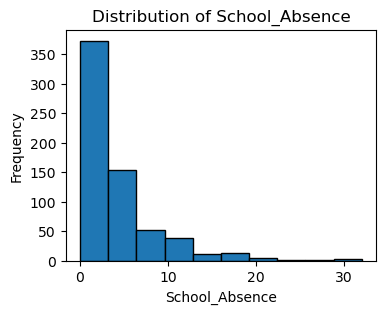

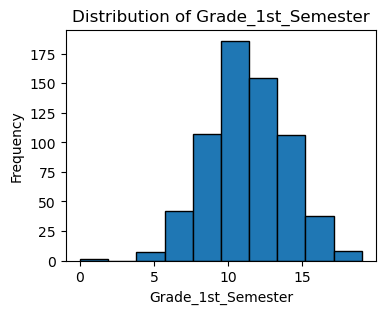

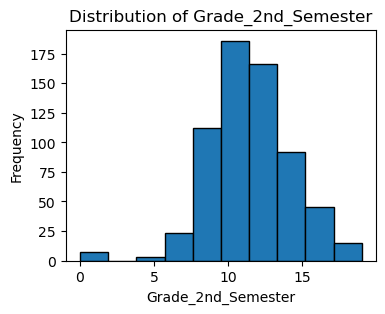

In [307]:
#Figure 1: Numerical Variable Distributions

for col in numerical_columns:
    plt.figure(figsize=(4, 3))
    plt.hist(dataset[col], bins=10, edgecolor="black")
    plt.title("Distribution of " + col)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [308]:
#high absenteeism -> set a threshold of high absence (>10 days) 

high_absence = 10
high_absence_count = dataset[dataset["School_Absence"] > high_absence].shape[0]
total_students = dataset.shape[0]
percentage_high_absence = (high_absence_count / total_students) * 100
print("Percentage of students with high absenteeism:", percentage_high_absence)

Percentage of students with high absenteeism: 7.550077041602465


In [311]:
#Find average grade and standard deviation for each semester

average_1sem_grade = dataset["Grade_1st_Semester"].mean()
grade_1sem_std = dataset["Grade_1st_Semester"].std()
print("Average 1st Semester Grade:", average_1sem_grade)
print("Standard Deviation of Grades:", grade_1sem_std)

average_2sem_grade = dataset["Grade_2nd_Semester"].mean()
grade_2sem_std = dataset["Grade_2nd_Semester"].std()
print("Average 2nd Semester Grade:", average_2sem_grade)
print("Standard Deviation of Grades:", grade_2sem_std)

Average 1st Semester Grade: 11.399075500770415
Standard Deviation of Grades: 2.745265128446369
Average 2nd Semester Grade: 11.570107858243452
Standard Deviation of Grades: 2.913638664303868


In [313]:
#as grade 1st and 2nd semester statistics (mean and SD) are similar
#combine two columns into one to simplify the analysis

dataset["Average_Grade"] = dataset[["Grade_1st_Semester", "Grade_2nd_Semester"]].mean(axis=1)

/var/folders/zl/q3jfwlms76dfjrk9dywsgcmm0000gn/T/ipykernel_1639/3511306122.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  absence_ranges = dataset.groupby("Absence_Group")["Average_Grade"].mean().reset_index()


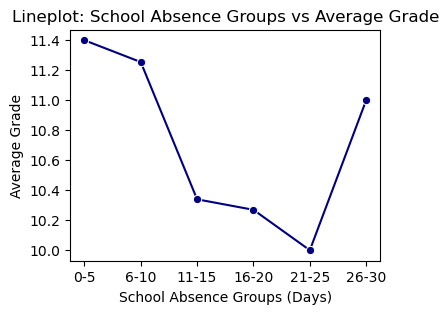

In [315]:
#Figure 2: Relationship between school absence (binned) and average grade

dataset["Absence_Group"] = pd.cut(dataset["School_Absence"], bins=[0, 5, 10, 15, 20, 25, 30], labels=["0-5", "6-10", "11-15", "16-20", "21-25", "26-30"])
absence_ranges = dataset.groupby("Absence_Group")["Average_Grade"].mean().reset_index()

plt.figure(figsize=(4, 3))
sns.lineplot(x="Absence_Group", y="Average_Grade", data=absence_ranges, marker="o", color="navy")
plt.title("Lineplot: School Absence Groups vs Average Grade")
plt.xlabel("School Absence Groups (Days)")
plt.ylabel("Average Grade")
plt.show()

In [319]:
#Assign orderings for categorical variables to display frequencies in ascending order

categorical_orderings = {
    "Gender": ["Female", "Male"],
    "Parental_Status": ["Living Together", "Separated"],
    "Mother_Education": ["None", "Primary School", "Lower Secondary School", "High School", "Higher Education"],
    "Father_Education": ["None", "Primary School", "Lower Secondary School", "High School", "Higher Education"],
    "Weekly_Study_Time": ["Up to 2h", "2 to 5h", "5 to 10h", "More than 10h"],
    "Extra_Educational_Support": ["No", "Yes"],
    "Parental_Educational_Support": ["No", "Yes"],
    "Private_Tutoring": ["No", "Yes"],
    "Extracurricular_Activity": ["No", "Yes"],
    "Desire_Graduate_Education": ["No", "Yes"],
    "Good_Family_Relationship": ["Very Poor", "Poor", "Fair", "Good", "Excellent"],
    "Alcohol_Weekdays": ["Very Low", "Low", "Moderate", "High", "Very High"],
    "Alcohol_Weekends": ["Very Low", "Low", "Moderate", "High", "Very High"]
}

for col, order in categorical_orderings.items():
    if col in dataset.columns:
        dataset[col] = pd.Categorical(dataset[col], categories=order, ordered=True)

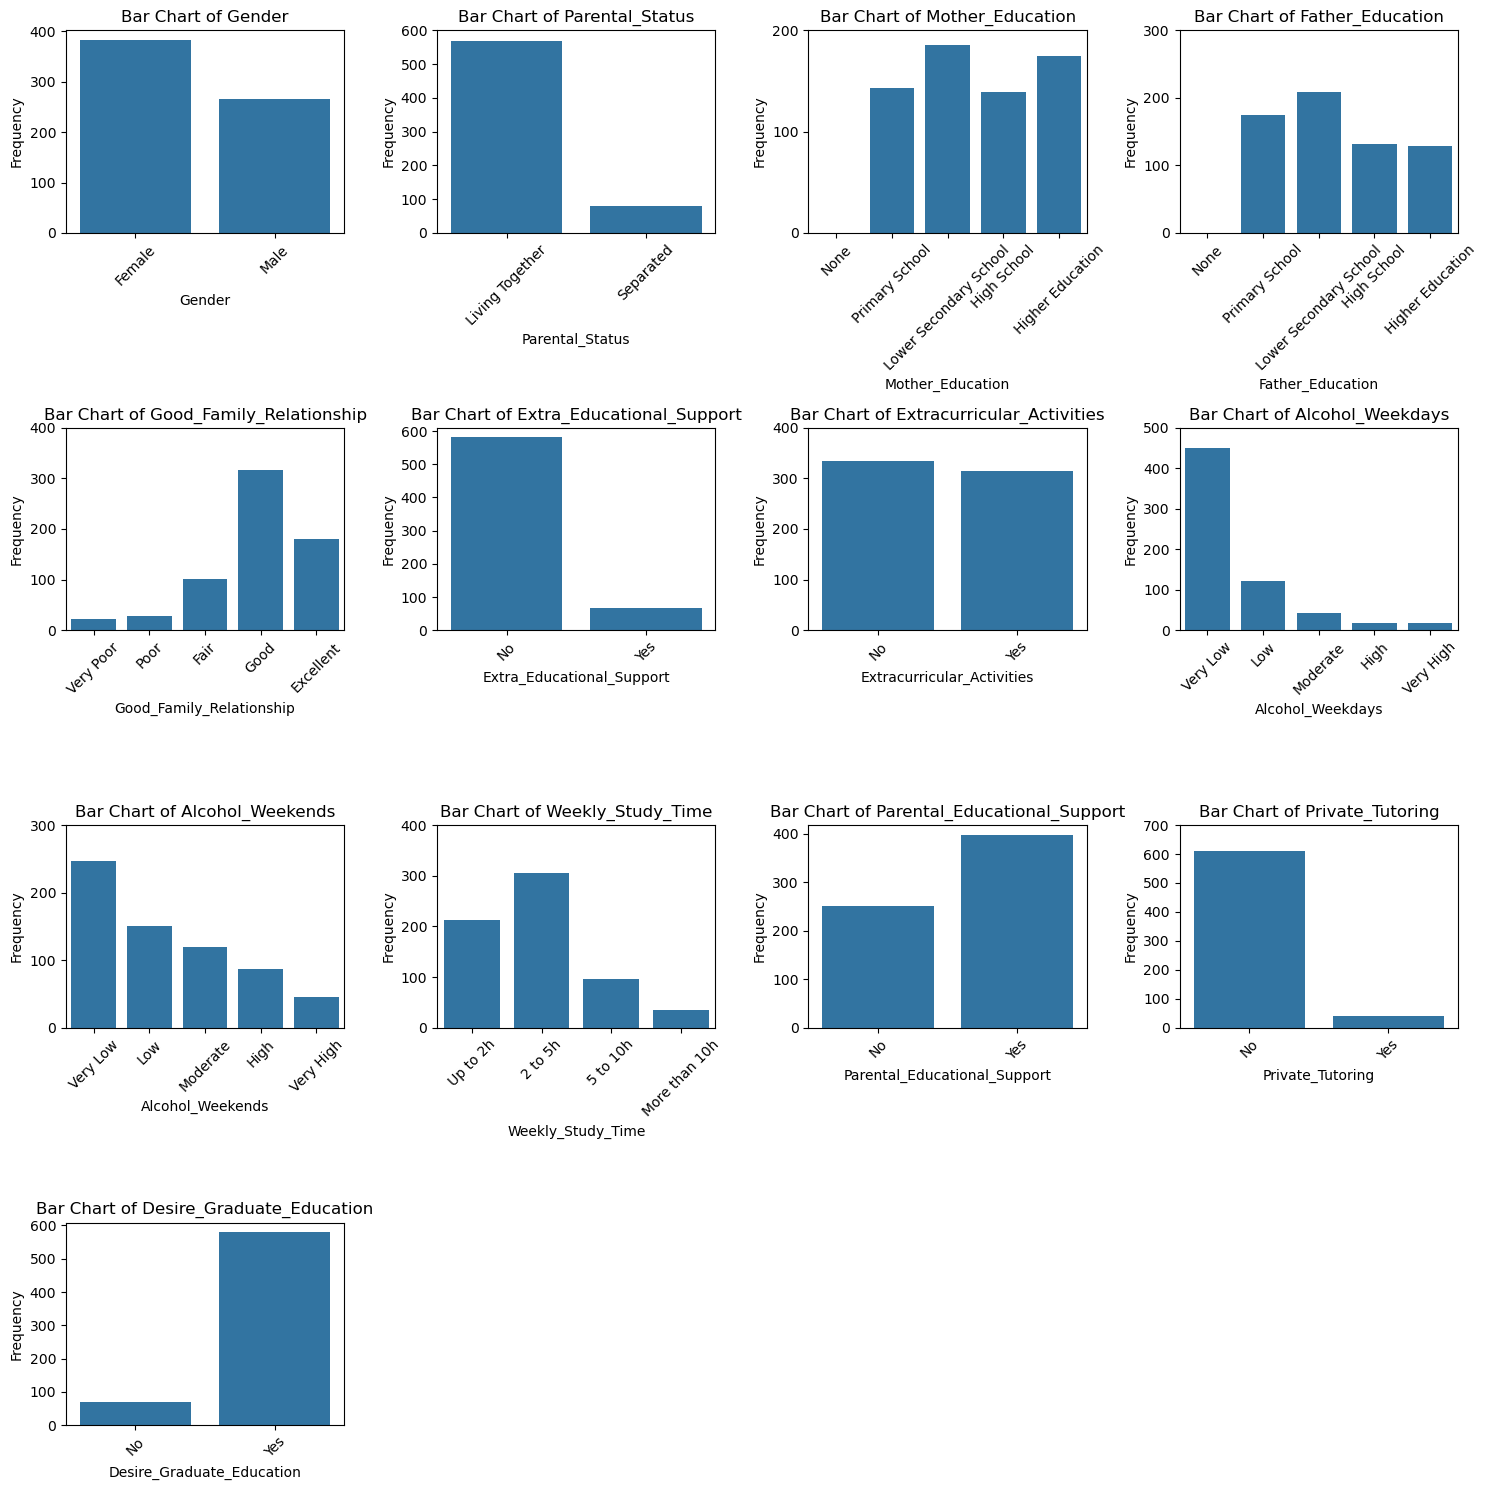

In [321]:
#Figure 3: Visualize categorical variable frequencies 

num_vars = len(categorical_vars)
cols = 4 
rows = (num_vars + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(categorical_vars):
    sns.countplot(x=col, data=dataset, ax=axes[i])
    axes[i].set_title("Bar Chart of " + col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
    axes[i].tick_params(axis='x', rotation=45)
    
    max_freq = dataset[col].value_counts().max()
    axes[i].set_yticks(range(0, max_freq + 101, 100))

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

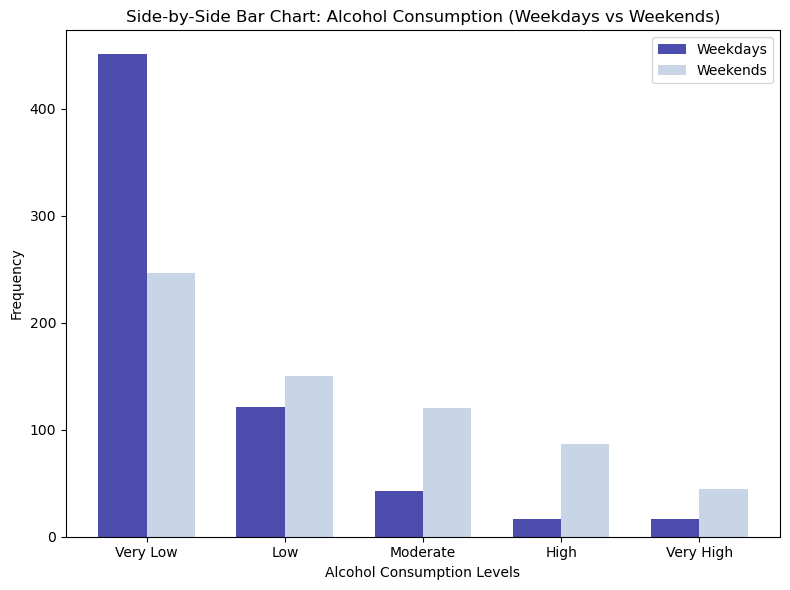

In [322]:
#Figure 4: Relationship between alcohol consumption on weekdays and weekends

common_index = alcohol_counts_weekdays.index.union(alcohol_counts_weekends.index)
weekdays_values = alcohol_counts_weekdays.reindex(common_index, fill_value=0)
weekends_values = alcohol_counts_weekends.reindex(common_index, fill_value=0)

bar_width = 0.35
positions = np.arange(len(common_index))

plt.figure(figsize=(8, 6))
plt.bar(positions - bar_width / 2, weekdays_values, width=bar_width, color="darkblue", alpha=0.7, label="Weekdays")
plt.bar(positions + bar_width / 2, weekends_values, width=bar_width, color="lightsteelblue", alpha=0.7, label="Weekends")
plt.xticks(positions, common_index)
plt.title("Side-by-Side Bar Chart: Alcohol Consumption (Weekdays vs Weekends)")
plt.xlabel("Alcohol Consumption Levels")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

In [324]:
#family engagement
#percentage of students with strong family relationships

strong_relationships = dataset[dataset["Good_Family_Relationship"].isin(["Good", "Excellent"])].shape[0]

total_students = dataset.shape[0]
percentage_strong_relationships = (strong_relationships / total_students) * 100

print("Percentage of students with strong family relationships:", percentage_strong_relationships)

Percentage of students with strong family relationships: 76.5793528505393


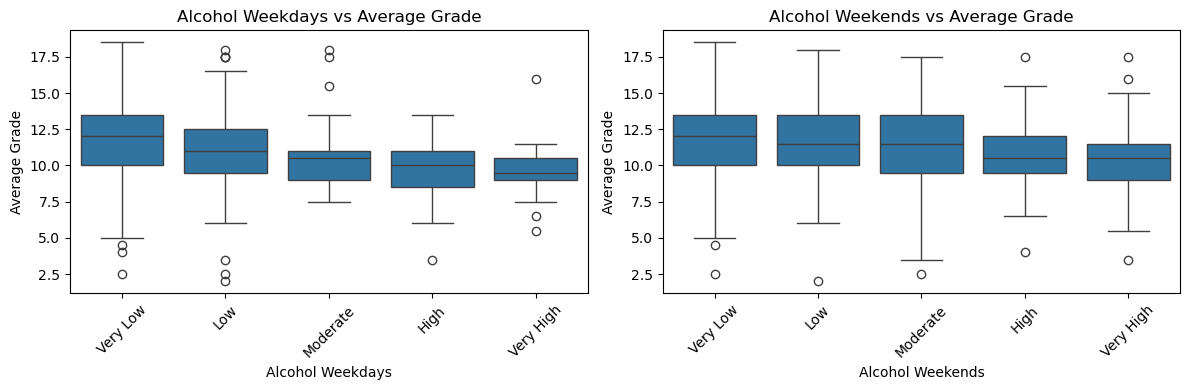

In [327]:
#Figure 5: Relationship between risky behavior trends and average grades

risky_behaviors = ["Alcohol_Weekdays", "Alcohol_Weekends"]

plt.figure(figsize=(12, 4))
for i, col in enumerate(risky_behaviors, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x=col, y="Average_Grade", data=dataset)
    plt.title(f"{col.replace('_', ' ')} vs Average Grade")
    plt.xlabel(col.replace('_', ' '))
    plt.ylabel("Average Grade")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

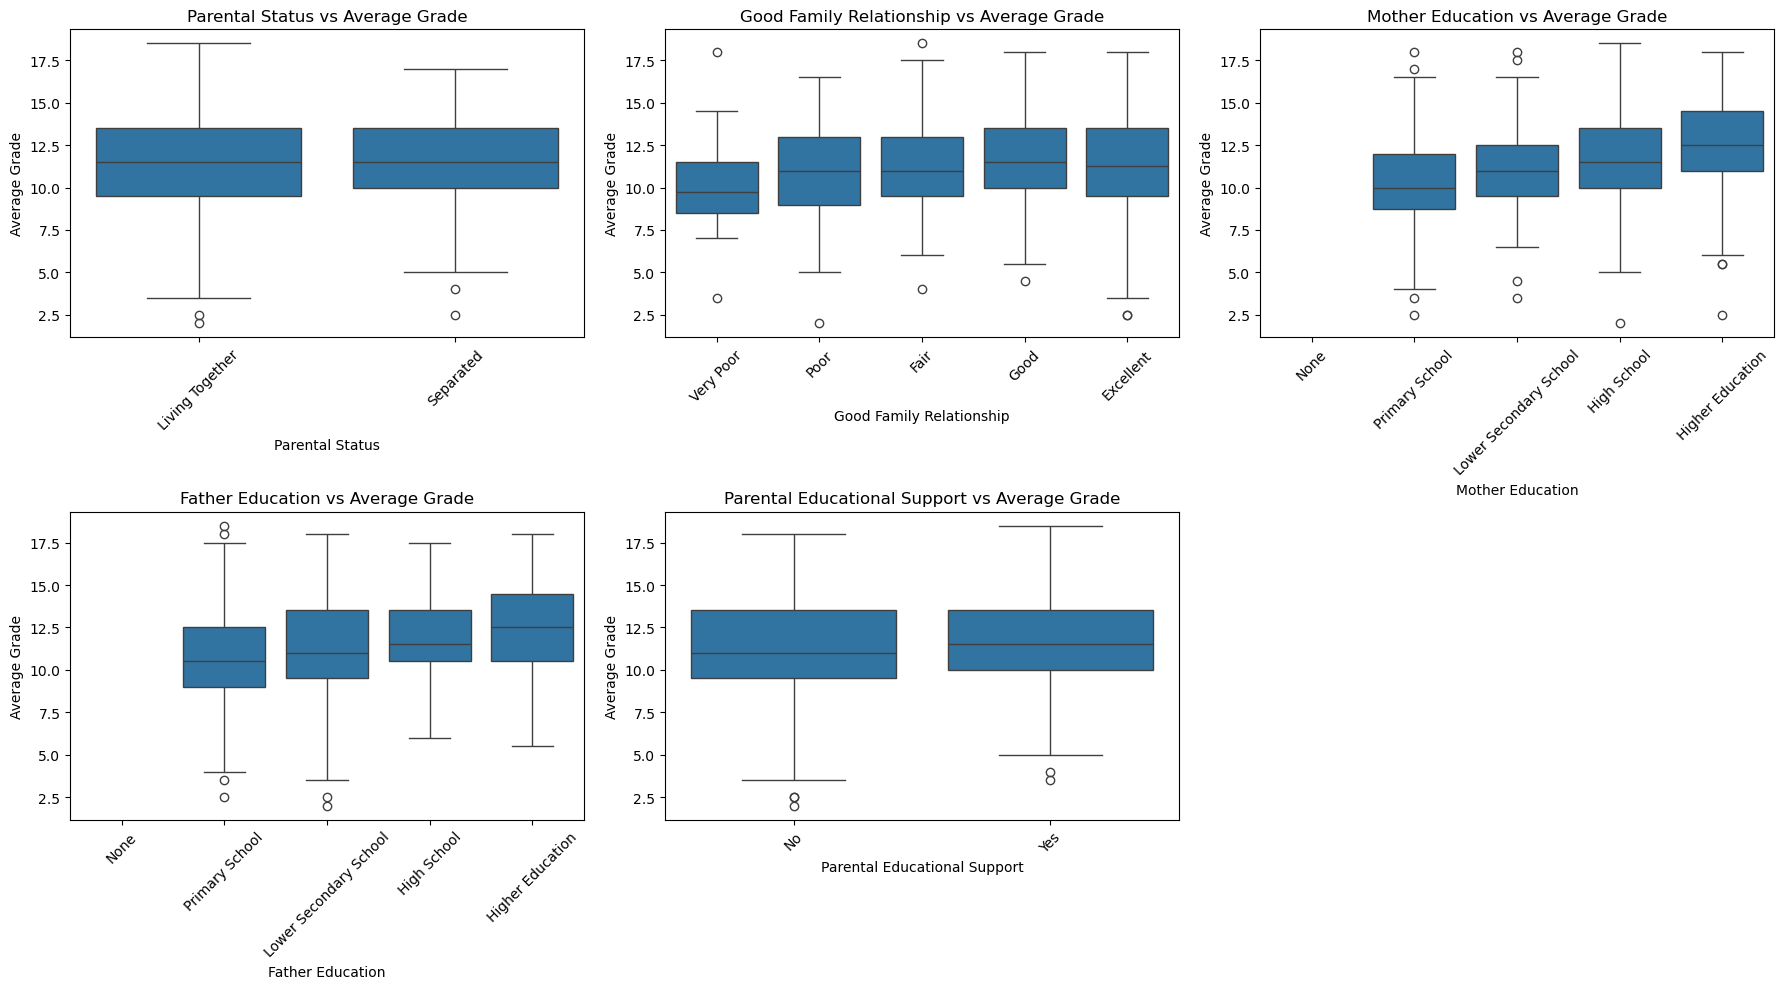

In [329]:
#Figure 6: Relationship betweeen family engagement and average grades

family_engagement = ["Parental_Status", "Good_Family_Relationship", "Mother_Education", 
                     "Father_Education", "Parental_Educational_Support"]

plt.figure(figsize=(18, 10))
for i, col in enumerate(family_engagement, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=col, y="Average_Grade", data=dataset)
    plt.title(f"{col.replace('_', ' ')} vs Average Grade")
    plt.xlabel(col.replace('_', ' '))
    plt.ylabel("Average Grade")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

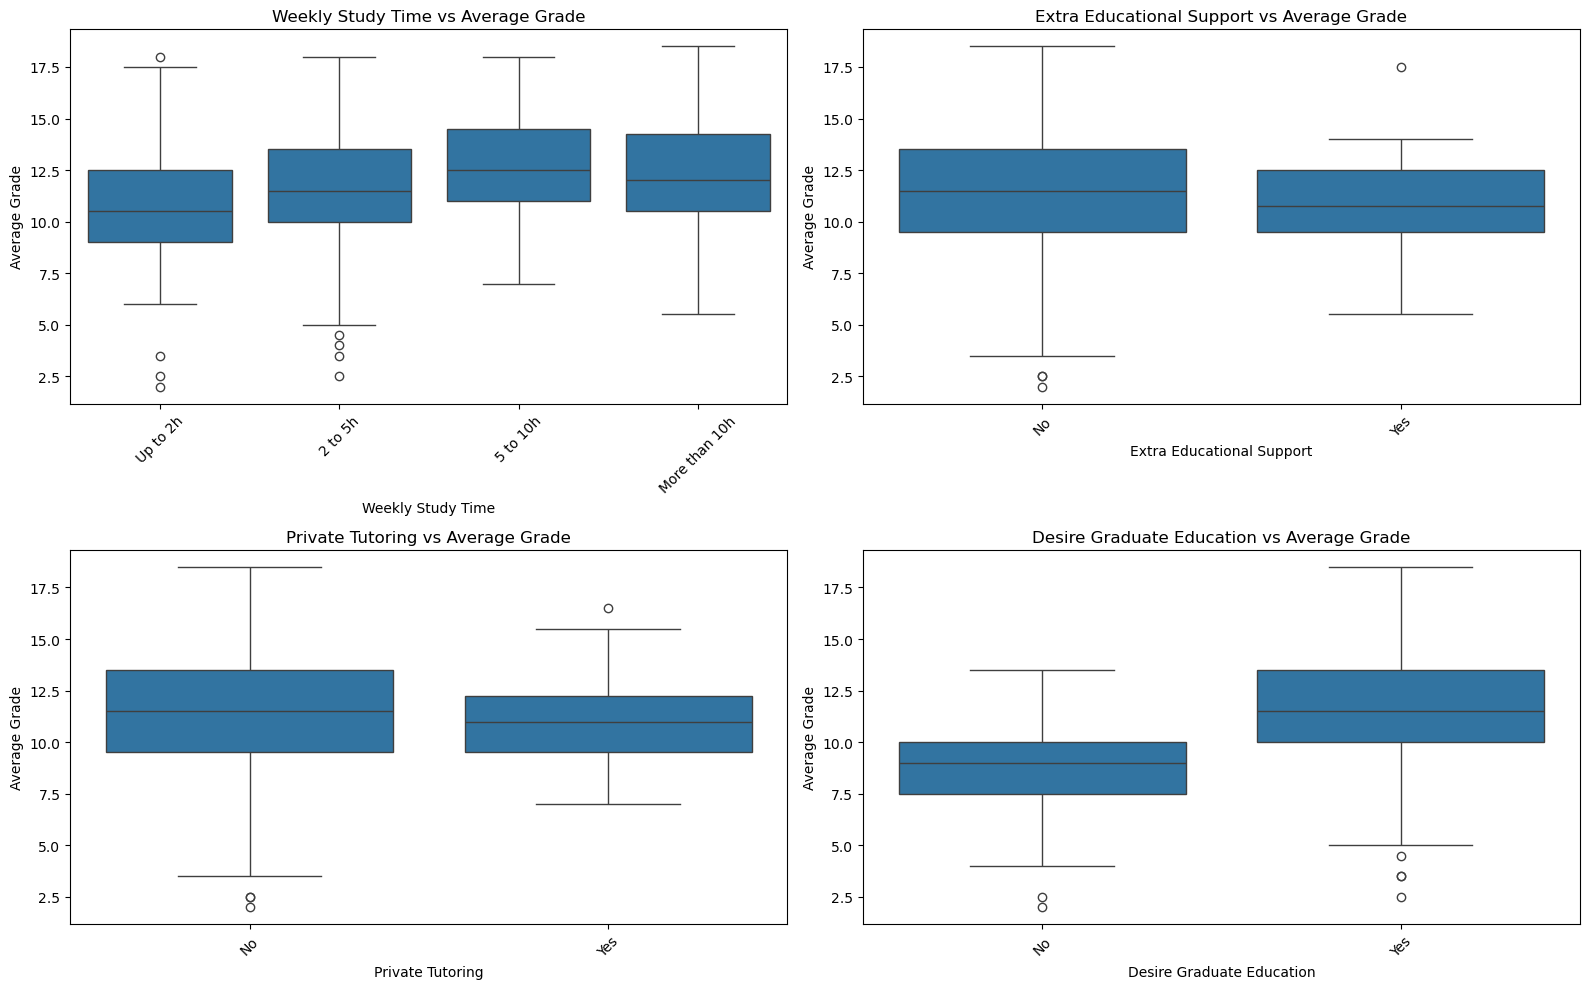

In [331]:
#Figure 7: Relationship between study commmitment and average grades

study_commitment = ["Weekly_Study_Time", "Extra_Educational_Support", 
                    "Private_Tutoring", "Desire_Graduate_Education"]

plt.figure(figsize=(16, 10))
for i, col in enumerate(study_commitment, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=col, y="Average_Grade", data=dataset)
    plt.title(f"{col.replace('_', ' ')} vs Average Grade")
    plt.xlabel(col.replace('_', ' '))
    plt.ylabel("Average Grade")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()